In [9]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
#from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

In [10]:
# load all the datasets to pandas DataFrames
klci         = pd.read_excel('data/Other Market/FTSE Malaysia KLCI Historical (Malaysia).xlsx',header=0)

biodiesel    = pd.read_excel('data/Biodiesel - CPO Price.xlsx',header=0)
oil_wti       = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB.csv', sep = "|",header=4)
oil_brent     = pd.read_csv('data/Europe_Brent_Spot_Price_FOB (1).csv', sep = "|",header=4)
usd          = pd.read_excel('data/Forex USD-MYR.xlsx',header=0)
jpy          = pd.read_csv('data/JPY_MYR Historical Data.csv')
ucci         = pd.read_excel('data/Upstream Capital Cost Index.xlsx',header=1)


se_dow       = pd.read_excel('data/Other Market/Dow Jones Industrial Average (DJI) (US).xlsx',header=0)
se_dax       = pd.read_excel('data/Other Market/DAX Historical Data (Germany).xlsx',header=0)
se_stoxx     = pd.read_excel('data/Other Market/Euro Stoxx 50 Historical Data (US).xlsx',header=0)

se_uk        = pd.read_excel('data/Other Market/FTSE 100 Historical Data (UK).xlsx',header=0)
se_sg        = pd.read_excel('data/Other Market/FTSE Straits Times Singapore Hi (Singapore).xlsx',header=0)
se_hs        = pd.read_excel('data/Other Market/Hang Seng Historical Data (HK).xlsx',header=0)
se_nasdaq    = pd.read_excel('data/Other Market/Nasdaq 100 Historical Data (US).xlsx',header=0)
se_nikkei    = pd.read_excel('data/Other Market/Nikkei 225 Historical Data (Japan).xlsx',header=0)
se_snp       = pd.read_excel('data/Other Market/S_P 500 (US).xlsx',header=0)
se_shanghai  = pd.read_excel('data/Other Market/Shanghai Composite Historical D (China).xlsx',header=0)

In [11]:
# Visually inspect the dataframes

klci.head()
biodiesel.head()
oil_wti.head()
oil_brent.head()
usd.head()
jpy.head()
ucci.head()
se_dow.head()
se_dax.head()
se_stoxx.head()
se_uk.head()
se_sg.head()
se_hs.head()
se_nasdaq.head()
se_nikkei.head()
se_snp.head()
se_shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",2852.35,2835.58,2855.38,2829.63,20.68B,0.0022
1,"May 28, 2020",2846.22,2838.21,2861.92,2820.15,20.75B,0.0033
2,"May 27, 2020",2836.80,2847.32,2849.00,2831.93,19.81B,-0.0034
3,"May 26, 2020",2846.55,2827.90,2848.34,2825.90,17.46B,0.0101
4,"May 25, 2020",2817.97,2816.24,2821.50,2802.47,17.29B,0.0015


In [6]:
# get the shape of the different datasets
dflist = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_my,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]

for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(2477, 7)
(241, 4)
(8670, 2)
(8382, 2)
(7818, 3)
(3407, 6)
(84, 2)
(2618, 7)
(2640, 7)
(2255, 7)
(2477, 7)
(2628, 7)
(2330, 7)
(2568, 7)
(2619, 7)
(2573, 7)
(2619, 7)
(2529, 7)


In [225]:
# get dataframe top rows view

for i, dfr in enumerate(dflist):
    print(dflist[i].head())

           Date    Price     Open     High      Low     Vol.  Change %
0  May 29, 2020  1473.25  1450.54  1473.77  1448.84  595.84M    0.0108
1  May 28, 2020  1457.50  1453.53  1458.73  1449.25  189.53M    0.0040
2  May 27, 2020  1451.73  1446.91  1458.24  1446.42  189.84M    0.0104
3  May 22, 2020  1436.76  1451.37  1451.44  1435.23  144.05M   -0.0106
4  May 21, 2020  1452.11  1437.49  1455.13  1437.13  168.06M    0.0118
                  Original Month-Year   Price  Price Cleansed
0        Apr 20001,413.60- 2000-04-01  1413.6          1413.6
1  May 20001,231.20-12.90  2000-05-01  1231.2          1231.2
2   Jun 20001,197.00-2.78  2000-06-01    1197          1197.0
3   Jul 20001,185.60-0.95  2000-07-01  1185.6          1185.6
4   Aug 20001,162.80-1.92  2000-08-01  1162.8          1162.8
         Day  Cushing OK WTI Spot Price FOB  Dollars per Barrel
0  5/27/2020                                              32.80
1  5/26/2020                                              34.70
2  5/22/20

In [226]:
# we look at the statistical charateristics of the datsets

for i, dfr in enumerate(dflist):
    print(dflist[i].describe())

             Price         Open        High          Low     Change %
count  2477.000000  2477.000000  2477.00000  2477.000000  2477.000000
mean   1666.653113  1666.370945  1671.74692  1660.694267     0.000068
std     134.667234   134.906438   134.34217   135.297094     0.006300
min    1219.720000  1217.280000  1242.82000  1207.800000    -0.052600
25%    1584.900000  1585.170000  1590.51000  1580.460000    -0.002900
50%    1672.720000  1673.840000  1678.24000  1667.680000     0.000200
75%    1774.000000  1774.420000  1778.47000  1769.120000     0.003400
max    1895.180000  1895.550000  1896.23000  1891.660000     0.068500
       Price Cleansed
count      241.000000
mean      2397.917510
std        751.643413
min        889.200000
25%       1668.200000
50%       2515.350000
75%       2943.860000
max       3980.250000
       Cushing OK WTI Spot Price FOB  Dollars per Barrel
count                                        8670.000000
mean                                           44.066501
s

max    3386.150000  3380.450000  3393.520000  3378.830000     0.093800
             Price         Open         High          Low     Change %
count  2529.000000  2529.000000  2529.000000  2529.000000  2529.000000
mean   2803.552309  2800.491898  2823.038466  2778.400759     0.000038
std     521.137895   520.432107   528.041639   510.755820     0.013577
min    1950.010000  1935.520000  1959.160000  1849.650000    -0.084900
25%    2358.980000  2358.760000  2372.030000  2339.880000    -0.005900
50%    2859.760000  2853.290000  2880.120000  2830.020000     0.000500
75%    3117.380000  3114.560000  3136.840000  3095.070000     0.006300
max    5166.350000  5174.420000  5178.190000  5103.400000     0.057600


In [227]:
# see which datasets have missing values

for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())

0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0


In [270]:
#drop missing value
ucci = ucci.dropna(axis=0)

### Observations and Data Cleaning:

 - For our purposes, most dataframe has extra columns so we will need to get rid of some of them.
 - The date formats need to be converted to a uniform format across all datasets.
 - ucci also has 3 NaN values so we have to remove entire rows where this exists
  - ucci and biodiesel data need to be upscaled

#### Biodiesel

In [15]:
dflist = [biodiesel]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

biodiesel.head()

(241, 4)


,Original,Month-Year,Price,Price Cleansed
0,"Apr 20001,413.60-",2000-04-01,1413.6,1413.6
1,"May 20001,231.20-12.90",2000-05-01,1231.2,1231.2
2,"Jun 20001,197.00-2.78",2000-06-01,1197,1197.0
3,"Jul 20001,185.60-0.95",2000-07-01,1185.6,1185.6
4,"Aug 20001,162.80-1.92",2000-08-01,1162.8,1162.8


In [16]:
#checking the date format (already in datetime format, so dont need to change)
biodiesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
Original          241 non-null object
Month-Year        241 non-null datetime64[ns]
Price             241 non-null object
Price Cleansed    241 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.6+ KB


In [17]:
# drop the unnecessary columns

biodiesel.drop(["Original", "Price"],axis=1,inplace=True)
biodiesel.head()

,Month-Year,Price Cleansed
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [18]:
biodiesel.columns = ["Date", "Biodiesel"]
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [19]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between
biodiesel = biodiesel.resample('D', on="Date").mean()
biodiesel = biodiesel.interpolate(method='linear')
print(biodiesel.head(10))


            Biodiesel
Date                 
2000-04-01    1413.60
2000-04-02    1407.52
2000-04-03    1401.44
2000-04-04    1395.36
2000-04-05    1389.28
2000-04-06    1383.20
2000-04-07    1377.12
2000-04-08    1371.04
2000-04-09    1364.96
2000-04-10    1358.88


In [20]:
# Bring the date column from the index into a column
biodiesel.reset_index(level=0,inplace=True)
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.60
1,2000-04-02,1407.52
2,2000-04-03,1401.44
3,2000-04-04,1395.36
4,2000-04-05,1389.28


#### UCCI

In [32]:
ucci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
Quarter                    84 non-null object
UCCI Asia and Australia    81 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [33]:
dflist = [ucci]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

ucci.head()

(84, 2)


,Quarter,UCCI Asia and Australia
0,Q1 2000,100.0
1,Q2 2000,100.0
2,Q3 2000,100.0
3,Q4 2000,100.0
4,Q1 2001,100.5


In [34]:
# rename columns
ucci.columns = ["Quarter","UCCI"]

In [35]:
# Convert the Quarter column to datetime format

ucci['Date'] = (
    pd.to_datetime(
        ucci['Quarter'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
))

ucci.head()

,Quarter,UCCI,Date
0,Q1 2000,100.0,2000-01-01
1,Q2 2000,100.0,2000-04-01
2,Q3 2000,100.0,2000-07-01
3,Q4 2000,100.0,2000-10-01
4,Q1 2001,100.5,2001-01-01


In [36]:
# Rearranging the column

cols = ucci.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Date', 'Quarter', 'UCCI']

In [37]:
# applying the column arrangement

ucci = ucci[cols]
ucci.tail()

,Date,Quarter,UCCI
79,2019-10-01,Q4 2019,182.591780
80,2020-01-01,Q1 2020,181.158439
81,2020-04-01,Q2 2020,NaN
82,2020-07-01,Q3 2020,NaN
83,2020-10-01,Q4 2020,NaN


In [38]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between

ucci = ucci.resample('D', on="Date").mean()
ucci = ucci.interpolate(method='linear')
print(ucci.tail(15))


                  UCCI
Date                  
2020-09-17  181.158439
2020-09-18  181.158439
2020-09-19  181.158439
2020-09-20  181.158439
2020-09-21  181.158439
2020-09-22  181.158439
2020-09-23  181.158439
2020-09-24  181.158439
2020-09-25  181.158439
2020-09-26  181.158439
2020-09-27  181.158439
2020-09-28  181.158439
2020-09-29  181.158439
2020-09-30  181.158439
2020-10-01  181.158439


In [39]:
# Bring the date column from the index into a column

ucci.reset_index(level=0,inplace=True)
ucci.head()

,Date,UCCI
0,2000-01-01,100.0
1,2000-01-02,100.0
2,2000-01-03,100.0
3,2000-01-04,100.0
4,2000-01-05,100.0


#### KLCI

In [11]:
klci.head()

(2477, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",1473.25,1450.54,1473.77,1448.84,595.84M,0.0108
1,"May 28, 2020",1457.50,1453.53,1458.73,1449.25,189.53M,0.0040
2,"May 27, 2020",1451.73,1446.91,1458.24,1446.42,189.84M,0.0104
3,"May 22, 2020",1436.76,1451.37,1451.44,1435.23,144.05M,-0.0106
4,"May 21, 2020",1452.11,1437.49,1455.13,1437.13,168.06M,0.0118


In [12]:
# change the DATE column from String to python's datetime format

klci["Date"] = pd.to_datetime(klci.Date)

In [13]:
# drop the unnecessary columns

klci.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
klci.head()

,Date,Price
0,2020-05-29,1473.25
1,2020-05-28,1457.50
2,2020-05-27,1451.73
3,2020-05-22,1436.76
4,2020-05-21,1452.11


In [14]:
# rename columns

klci.columns = ["Date", "KLCI"]
klci.head()

,Date,KLCI
0,2020-05-29,1473.25
1,2020-05-28,1457.50
2,2020-05-27,1451.73
3,2020-05-22,1436.76
4,2020-05-21,1452.11


#### Crude oil - WTI

In [21]:
dflist = [oil_wti]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

oil_wti.head()

(8670, 2)


,Day,Cushing OK WTI Spot Price FOB Dollars per Barrel
0,5/27/2020,32.80
1,5/26/2020,34.70
2,5/22/2020,33.49
3,5/21/2020,34.30
4,5/20/2020,33.56


In [22]:
# rename columns

oil_wti.columns = ['Date', 'oil_wti']


# change the DATE column from String to datetime format

oil_wti["Date"] = pd.to_datetime(oil_wti.Date)

oil_wti.head()

,Date,oil_wti
0,2020-05-27,32.80
1,2020-05-26,34.70
2,2020-05-22,33.49
3,2020-05-21,34.30
4,2020-05-20,33.56


#### Crude oil - brent

In [23]:
dflist = [oil_brent]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

oil_brent.head()

(8382, 2)


,Day,Europe Brent Spot Price FOB Dollars per Barrel
0,5/27/2020,32.73
1,5/26/2020,33.95
2,5/22/2020,33.80
3,5/21/2020,34.78
4,5/20/2020,34.76


In [24]:
# rename columns

oil_brent.columns = ['Date', 'oil_brent']


# change the DATE column from String to datetime format

oil_brent["Date"] = pd.to_datetime(oil_brent.Date)

oil_brent.head()

,Date,oil_brent
0,2020-05-27,32.73
1,2020-05-26,33.95
2,2020-05-22,33.80
3,2020-05-21,34.78
4,2020-05-20,34.76


#### USD to MYR Currency Exchange

In [25]:
usd.head()

,Date,USD,MYR
0,2020-05-30,1,4.3475
1,2020-05-29,1,4.3475
2,2020-05-28,1,4.3555
3,2020-05-27,1,4.3475
4,2020-05-26,1,4.3635


In [26]:
# drop the unnecessary columns
usd.drop(["USD"],axis=1,inplace=True)
usd.head()

,Date,MYR
0,2020-05-30,4.3475
1,2020-05-29,4.3475
2,2020-05-28,4.3555
3,2020-05-27,4.3475
4,2020-05-26,4.3635


In [27]:
# rename columns
usd.columns = ["Date", "USD"]
usd.head()

,Date,USD
0,2020-05-30,4.3475
1,2020-05-29,4.3475
2,2020-05-28,4.3555
3,2020-05-27,4.3475
4,2020-05-26,4.3635


#### JPY to MYR Currency Exchange

In [28]:
jpy.head()

,Date,Price,Open,High,Low,Change %
0,"May 29, 2020",0.04033,0.04042,0.04063,0.04030,-0.23%
1,"May 28, 2020",0.04042,0.04036,0.04046,0.04030,0.15%
2,"May 27, 2020",0.04036,0.04059,0.04065,0.04028,-0.58%
3,"May 26, 2020",0.04059,0.04052,0.04063,0.04035,0.18%
4,"May 25, 2020",0.04052,0.04050,0.04054,0.04049,0.05%


In [29]:
jpy["Date"] = pd.to_datetime(jpy.Date)

In [30]:
# drop the unnecessary columns
jpy.drop(["Open", "High", "Low", "Change %"],axis=1,inplace=True)
jpy.head()

,Date,Price
0,2020-05-29,0.04033
1,2020-05-28,0.04042
2,2020-05-27,0.04036
3,2020-05-26,0.04059
4,2020-05-25,0.04052


In [31]:
# rename columns
jpy.columns = ["Date", "JPY"]
jpy.head()

,Date,JPY
0,2020-05-29,0.04033
1,2020-05-28,0.04042
2,2020-05-27,0.04036
3,2020-05-26,0.04059
4,2020-05-25,0.04052


#### Down Jones

In [40]:
dflist = [se_dow]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

se_dow.head()

(2618, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",25383.11,25324.15,25482.80,25031.67,545.14M,-0.0007
1,"May 28, 2020",25400.64,25697.36,25758.79,25358.73,378.40M,-0.0058
2,"May 27, 2020",25548.27,25298.63,25551.56,25009.87,420.36M,0.0221
3,"May 26, 2020",24995.11,24781.84,25176.42,24781.84,426.29M,0.0217
4,"May 22, 2020",24465.16,24461.98,24481.64,24294.07,255.66M,-0.0004


In [41]:
se_dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 7 columns):
Date        2618 non-null object
Price       2618 non-null float64
Open        2618 non-null float64
High        2618 non-null float64
Low         2618 non-null float64
Vol.        2618 non-null object
Change %    2618 non-null float64
dtypes: float64(5), object(2)
memory usage: 143.2+ KB


In [42]:
# change the DATE column from String to python's datetime format

se_dow["Date"] = pd.to_datetime(se_dow.Date)

In [43]:
# drop the unnecessary columns

se_dow.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_dow.head()

,Date,Price
0,2020-05-29,25383.11
1,2020-05-28,25400.64
2,2020-05-27,25548.27
3,2020-05-26,24995.11
4,2020-05-22,24465.16


In [44]:
# rename columns

se_dow.columns = ["Date", "Dow Jones"]
se_dow.head()

,Date,Dow Jones
0,2020-05-29,25383.11
1,2020-05-28,25400.64
2,2020-05-27,25548.27
3,2020-05-26,24995.11
4,2020-05-22,24465.16


#### Other Column

In [46]:
#  Changing the DATE column from String to python's datetime format for 

klci["Date"] = pd.to_datetime(klci.Date)
oil_wti["Day"] = pd.to_datetime(oil_wti.Day)
oil_brent["Day"] = pd.to_datetime(oil_brent.Day)
jpy["Date"] = pd.to_datetime(jpy.Date)

se_dow["Date"] = pd.to_datetime(se_dow.Date)
se_dax["Date"] = pd.to_datetime(se_dax.Date)
se_stoxx["Date"] = pd.to_datetime(se_stoxx.Date)
se_uk["Date"] = pd.to_datetime(se_uk.Date)
se_my["Date"] = pd.to_datetime(se_my.Date)
se_sg["Date"] = pd.to_datetime(se_sg.Date)
se_hs["Date"] = pd.to_datetime(se_hs.Date)
se_nasdaq["Date"] = pd.to_datetime(se_nasdaq.Date)
se_nikkei["Date"] = pd.to_datetime(se_nikkei.Date)
se_snp["Date"] = pd.to_datetime(se_snp.Date)
se_shanghai["Date"] = pd.to_datetime(se_shanghai.Date)

se_shanghai.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-05-29,2852.35,2835.58,2855.38,2829.63,20.68B,0.0022
1,2020-05-28,2846.22,2838.21,2861.92,2820.15,20.75B,0.0033
2,2020-05-27,2836.80,2847.32,2849.00,2831.93,19.81B,-0.0034
3,2020-05-26,2846.55,2827.90,2848.34,2825.90,17.46B,0.0101
4,2020-05-25,2817.97,2816.24,2821.50,2802.47,17.29B,0.0015


In [47]:
# Dropping unnecassary columns 

klci.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
usd.drop(["USD"],axis=1,inplace=True)
jpy.drop(["Open", "High", "Low", "Change %"],axis=1,inplace=True)

se_dow.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_dax.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_stoxx.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_uk.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_my.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_sg.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_hs.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_nasdaq.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_nikkei.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_snp.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_shanghai.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)

se_shanghai.head()

,Date,Price
0,2020-05-29,2852.35
1,2020-05-28,2846.22
2,2020-05-27,2836.80
3,2020-05-26,2846.55
4,2020-05-25,2817.97


In [48]:
# Changing Columns

klci.columns = ["Date", "KLCI"]
oil_wti.columns = ['Date', 'oil_wti']
oil_brent.columns = ['Date', 'oil_brent']
usd.columns = ["Date", "USD"]
jpy.columns = ["Date", "JPY"]

se_dow.columns = ["Date", "Dow Jones"]
se_dax.columns = ["Date", "DAX"]
se_stoxx.columns = ["Date", "STOXX"]
se_uk.columns = ["Date", "United Kingdom"]
se_my.columns = ["Date", "Malaysia"]
se_sg.columns = ["Date", "Singapore"]
se_hs.columns = ["Date", "Hang_Seng"]
se_nasdaq.columns = ["Date", "Nasdaq"]
se_nikkei.columns = ["Date", "Nikkei"]
se_snp.columns = ["Date", "SP500"]
se_shanghai.columns = ["Date", "Shanghai"]

se_shanghai.head()

,Date,Shanghai
0,2020-05-29,2852.35
1,2020-05-28,2846.22
2,2020-05-27,2836.80
3,2020-05-26,2846.55
4,2020-05-25,2817.97


## Merging

In [49]:
dfs = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_my,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]
df = reduce(lambda left,right: pd.merge(left,right,on='Date', how='outer'), dfs).dropna()
df

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones,DAX,STOXX,Malaysia,United Kingdom,Singapore,Hang_Seng,Nasdaq,Nikkei,SP500,Shanghai
37,2020-04-01,1322.66,2651.880000,20.28,14.97,4.3575,0.04063,181.158439,20943.51,9544.75,2680.30,1322.66,5454.57,2440.27,23085.79,7486.29,18065.41,2470.50,2734.52
38,2020-03-31,1350.89,2654.368065,20.51,14.85,4.3200,0.04012,181.158439,21917.16,9935.84,2786.90,1350.89,5671.96,2481.23,23603.48,7813.50,18917.01,2584.59,2750.30
39,2020-03-30,1328.88,2656.856129,14.10,19.19,4.3326,0.04011,181.158439,22327.48,9815.97,2765.62,1328.88,5563.74,2416.24,23175.11,7889.01,19084.97,2626.65,2747.21
40,2020-03-27,1343.09,2664.320323,15.48,22.39,4.3381,0.04009,181.158439,21636.78,9632.52,2728.65,1343.09,5510.33,2528.76,23484.28,7588.37,19389.43,2541.47,2772.20
41,2020-03-26,1328.09,2666.808387,16.60,23.55,4.3350,0.03997,181.158439,22552.17,10000.96,2847.78,1328.09,5815.73,2487.56,23352.34,7897.13,18664.60,2630.07,2764.91
42,2020-03-25,1324.50,2669.296452,20.75,25.62,4.3865,0.03960,181.158439,21200.55,9874.26,2800.14,1324.50,5688.20,2505.47,23527.19,7469.62,19546.63,2475.56,2781.59
43,2020-03-24,1291.14,2671.784516,21.03,24.50,4.4305,0.03987,181.158439,20704.91,9700.57,2715.11,1291.14,5446.01,2362.05,22663.49,7553.83,18092.35,2447.33,2722.44
44,2020-03-23,1259.88,2674.272581,23.33,23.75,4.4450,0.04008,181.158439,18591.93,8741.15,2485.54,1259.88,4993.89,2233.48,21696.13,7006.92,16887.78,2237.40,2660.17
46,2020-03-19,1219.72,2684.224839,25.09,23.98,4.4150,0.03967,181.158439,20087.19,8610.43,2454.08,1219.72,5151.61,2311.00,21709.13,7288.52,16552.83,2409.39,2702.13
47,2020-03-18,1239.01,2686.712903,20.48,22.79,4.3710,0.04034,181.158439,19898.92,8441.71,2385.82,1239.01,5080.58,2425.62,22291.82,7175.18,16726.55,2398.10,2728.76


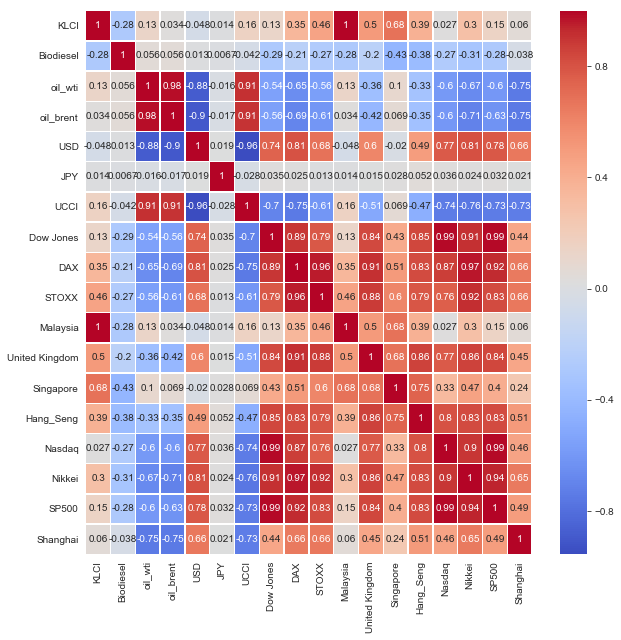

In [50]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5)